In [140]:
exec(open("cleanup.py").read())

In [141]:
import json
from collections import defaultdict
import pandas as pd

def get_response(fname):
    with open(fname, 'r') as f:
        data = f.read()

    response = json.loads(data)

    surv_resp = defaultdict(dict)
    pass_resp = defaultdict(str)
    time_resp = defaultdict(str)

    for k, v in response.items():
        if 'response' in k:
            temp = k.split("_")
            pid = temp[0].strip('p')
            v = json.loads(v)
            surv_resp[pid].update(v)
        elif 'time' in k:
            temp = k.split("_")
            pid = temp[0]
            time_resp[pid] = float(v)
        elif 'password' in k:
            pass_resp[k] = v

    return (pass_resp, time_resp, surv_resp)

In [142]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [143]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []

}

In [144]:
questions = {}
for page_id in [3, 7, 8, 12, 14]:
    page_name = page_map.get(str(page_id))
    question_file = f'{page_name}.json'

    with open(f'questions/{question_file}', 'r') as f:
        questions[str(page_id)] = json.loads(f.read())

def get_qdetails(pid, qsid):
    pid = str(pid)
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text

In [145]:
import os
fpath = './responses'
password_response = []
time_response = []
survey_response = []
for i, fname in enumerate(os.listdir(fpath)):
    pss, tim, sur = get_response(os.path.join(fpath, fname))
    password_response.append(pss)
    time_response.append(tim)
    survey_response.append(sur)

In [146]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password1,password2
0,wiaZKRUAaEs8U2zn,YsRwm2wzonvh4oAa
1,8989,8989
2,VivoBook1968,VivoBook1968
3,Bighulais#1,Bighulais#1
4,Majic@456,Majic@456


In [147]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpass,fcog,fpasssurvey,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,42.389,49.202,14.825,49.321,12.559,14.486,52.395,74.865,205.422,13.101,23.916,8.315,30.411,12.394,41.841,10.757367
1,14.569,149.773,47.463,47.241,68.721,20.503,17.572,94.074,105.875,20.193,14.363,24.043,21.694,17.183,73.928,12.286583
2,3.298,69.845,14.043,39.816,14.275,5.905,22.163,53.039,131.643,9.726,20.780,9.444,23.251,14.884,61.527,8.227317
3,3.308,39.036,37.693,35.079,11.956,4.139,20.266,45.554,125.934,9.552,25.341,18.969,13.903,11.623,35.289,7.294033
4,4.410,15.659,33.996,31.858,11.900,2.979,8.667,32.532,79.093,6.149,8.599,24.214,30.677,6.750,42.153,5.660600


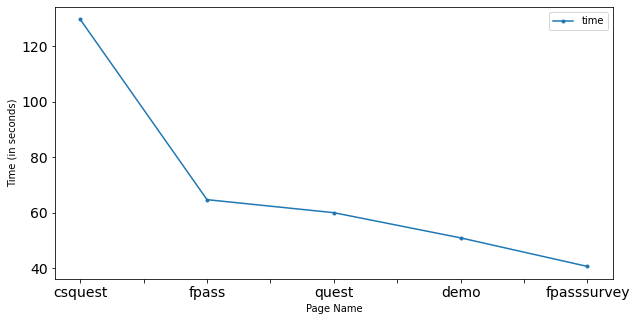

In [148]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [149]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,12,3,8,7,14
0,"{'1-1': '7', '2-1': '7', '2-2': '1', '2-3': '7...","{'1-1': '7', '2-1': '7', '2-2': '1', '2-3': '1...","{'1-3': '3', '1-5': '6', '1-6': '3', '1-8': '3...","{'1-8': '4', '1-1': '7', '1-6': '7', '1-4': '1...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."
1,"{'1-1': '7', '2-1': '7', '2-2': '2', '2-3': '7...","{'1-1': '7', '2-1': '6', '2-2': '2', '2-3': '5...","{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-16': '6', '1-14': '6', '1-13': '6', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'..."
2,"{'1-1': '3', '2-1': '2', '2-2': '4', '2-3': '1...","{'1-1': '4', '2-1': '2', '2-2': '5', '2-3': '1...","{'6-1': '1', '8-1': ['Social Media', 'Email', ...","{'1-15': '6', '1-17': '6', '1-14': '7', '1-12'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-..."
3,"{'1-1': '7', '2-1': '4', '2-2': '1', '2-3': '1...","{'1-1': '7', '2-1': '5', '2-2': '1', '2-3': '1...","{'1-3': '3', '1-6': '6', '1-4': '4', '1-2': '5...","{'1-6': '7', '1-4': '2', '1-10': '6', '1-8': '...","{'1-1': 'Man', '2-1': '40-44 years old', '3-1'..."
4,"{'1-1': '6', '2-1': '5', '2-2': '3', '2-3': '7...","{'1-1': '6', '2-1': '5', '2-2': '7', '2-3': '6...","{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-12': '4', '1-16': '5', '1-14': '5', '1-15'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."


### Attention Check

In [212]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   }
}

In [170]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [238]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

print(attentive_participants)

defaultdict(<function <lambda> at 0x7fd17989f790>, {0: True, 1: False, 2: True, 3: True, 4: True})


### First Password Survey Analysis

In [153]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,The password I have created is:,"[{'sid': 1, 'type': 'likert', 'title': '', 'el..."
1,2,The password I have created:,"[{'sid': 1, 'type': 'likert', 'title': 'is har..."
2,3,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [154]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4
1-1,7,7,4,7,6
2-1,7,6,2,5,5
2-2,1,2,5,1,7
2-3,1,5,1,1,6
3-1,3,3,6,6,5
3-2,7,3,6,6,5
3-3,7,3,5,4,7
3-4,3,3,5,2,6


In [155]:
get_qdetails('3', '1-1')

"The password I have created is: \n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Weak', 'high': 'Strong'}}"

In [156]:
# quest
pd.DataFrame(survey_response_df['7'].to_dict())

,0,1,2,3,4
1-8,4,6,6,4,7
1-1,7,6,7,6,6
1-6,7,6,7,7,7
1-4,1,6,1,2,5
1-10,4,6,6,6,5
1-3,7,6,6,7,6
1-7,4,6,6,4,6
1-2,7,6,7,7,3
1-5,4,6,5,3,4
1-9,4,6,6,6,5


In [157]:
# csquest
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4
1-3,3,6,4,3,3
1-5,6,5,7,6,7
1-6,3,5,6,6,3
1-8,3,5,6,6,6
1-4,4,6,6,4,5
1-2,2,5,6,5,6
1-1,4,6,5,4,7
1-7,1,6,7,6,4
2-1,6,6,6,6,6
3-1,1,5,2,1,5


In [158]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1,2,3,4
1-1,Man,Man,Woman,Man,Man
2-1,25-29 years old,30-34 years old,50-54 years old,40-44 years old,35-39 years old
3-1,[White],[White],[White],[Asian],[White]
4-1,High School Graduate,Four-year College Degree,Four-year College Degree,Graduate degree (MS/Doctorate),Four-year College Degree
5-1,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...","Economics, Humanities and Social Sciences","Computer Science/Engineering, and Information ...","Economics, Humanities and Social Sciences"
6-1,Business or industry,I prefer not to answer,Non-profit organization,Business or industry,Business or industry
7-1,Self-taught,Pursuing or completed a degree,Pursuing or completed a degree,Pursuing or completed a degree,Self-taught
8-1,Self-taught,Pursuing or completed a degree,Self-taught,Self-taught,Self-taught
